## Instalação das bibliotecas

In [ ]:
#!pip install networkx

## Importação das bibliotecas

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import scipy as sp
import math
import random
import copy
import time

from google.colab import files
from networkx.utils import reverse_cuthill_mckee_ordering #RCM
from scipy.io import mmread

In [ ]:
# Funcao para calcular os pesos da matriz de adjacencia

def calcula_pesos_arestas(m_a): # Recebe uma matriz de adjacencia csr
    n_vx = m_a.shape[0]
    n_vy = m_a.shape[1]
    for i in range(n_vx):
        for j in range(n_vy):
            if (m_a[i,j] != 0):
                if (j - i > 0):
                    m_a[i,j] = j - i
                else:
                    m_a[i,j] = -(j - i)
    return m_a # Retorna matriz de adjacencia com pesos

In [ ]:
# Funcao para calcular a largura de banda da matriz

def maiorBanda(m_a): # Recebe uma matriz de adjacencia
    n_vx = m_a.shape[0]
    n_vy = m_a.shape[1]
    maior = 1
    for i in range(n_vx):
        for j in range(n_vy):
            if m_a[i,j] > 0 and m_a[i,j] > maior:
                maior = m_a[i,j]
                #print('\n\n\n', maior, '\n\n\n')
    return maior # Retorna a maior largura de banda

In [ ]:
# Funcao para fazer o upload das matrizes analisadas

def fazerUploadMatrizes(lm): # Recebe uma lista vazia
    uploaded = files.upload()
    for fn in uploaded.keys():
        print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])), '\n')
        lm.append(fn)
    
    return lm # Retorna uma lista de matrizes esparsas

In [ ]:
# Funcao para plotar um grafo com algumas informacoes

def mostrarGrafo(G): # Recebe um grafo
    print('Lista dos graus: ', nx.degree_histogram(G), '\n')
    print(nx.info(G), '\n')
    nx.draw(G, with_labels=True)

In [ ]:
# Funcao para aplicar a heuristica reverse_cuthill_mckee

def rcm(grafo): # Recebe um grafo
    nlist = list(reverse_cuthill_mckee_ordering(grafo,heuristic=escolhe_ini_rcm))

    # Retorna uma matriz esparsa com os pesos atualizados depois de aplicar o rcm
    return calcula_pesos_arestas(nx.to_scipy_sparse_matrix(grafo, nodelist=nlist))

In [ ]:
# Funcao para aplicar a heuristica reverse_cuthill_mckee

def rcm_menor(grafo): # Recebe um grafo
    nlist = list(reverse_cuthill_mckee_ordering(grafo,heuristic=smallest_degree))

    # Retorna uma matriz esparsa com os pesos atualizados depois de aplicar o rcm
    return calcula_pesos_arestas(nx.to_scipy_sparse_matrix(grafo, nodelist=nlist))

In [ ]:
# Funcao para escolher um vertice aleatorio de um grafo

def escolhe_ini_rcm(g): # Recebe um grafo

    # Retorna um vertice aleatorio
    return random.randint(0,(g.number_of_nodes()-1))

In [ ]:
def smallest_degree(G):
    return min(G, key=G.degree)

In [ ]:
# Funcao para criar a populacao inicial

def criar_populacao_inicial(mz, tam): # Recebe uma matriz de adjacencia
                                      # e o tamanho da populacao
    
    populacao = []
    g = nx.from_scipy_sparse_matrix(mz)


    for i in range(0, tam):
        populacao.append(rcm(g))
    
    return populacao # Retorna uma lista de matrizes

In [ ]:
# Funcao para cruzar dois membros da populacao

def crossover(populacao, lista_larguras, indice1, indice2, taxa_mutacao): 
    # Recebe a lista de matrizes (populacao), a lista de largura de banda da
    # populacao, os indices dos dois membros que serao cruzados e a taxa de
    # mutacao
    x = random.uniform(0.00, 1)

    if (lista_larguras[indice1] > lista_larguras[indice2]):
        if (x <= taxa_mutacao): # Se ocorrer mutacao, retorna o pior membro
            return populacao[indice1]
        return criar_novo_membro(populacao[indice2]) # Se nao retorna o melhor membro com rcm
    else:
        if (x <= taxa_mutacao): # Se ocorrer mutacao, retorna o pior membro
            return populacao[indice2]
        return criar_novo_membro(populacao[indice1]) # Se nao retorna o melhor membro com rcm
        
    # Retorna a matriz (membro) que tem menor largura de banda entre as duas

In [ ]:
# Funcao para calcular a largura de banda de cada membro da populacao

def calcular_largura_banda_populacao(populacao): 
    # Recebe a lista (pupulacao) de matrizes

    lbp = []

    for i in range(0, len(populacao)):
        #print('\n\n', maiorBanda(populacao[i]), '\n\n')
        lbp.append(maiorBanda(populacao[i]))
    
    return lbp # Retorna uma lista com a largura de banda de todos os membros da populacao

In [ ]:
# Funcao para criar um novo membro

def criar_novo_membro(mz): # Recebe uma matriz
    return rcm(nx.from_scipy_sparse_matrix(mz)) # Retorna uma matriz que representa o membro

In [ ]:
# Funcao para escolher um membro da populacao

def escolhe_reprodutor(lista_de_bandas): # Recebe a lista de largura de banda  
                                         # da populacao

    array = np.array(lista_de_bandas)
    temp = array.argsort()
    ranks = np.empty_like(temp)
    ranks[temp] = np.arange(len(array))

    fitness = [len(ranks) - x for x in ranks]
    
    cum_scores = copy.deepcopy(fitness)
    
    for i in range(1,len(cum_scores)):
        cum_scores[i] = fitness[i] + cum_scores[i-1]
        
    probs = [x / cum_scores[-1] for x in cum_scores]
    
    rand = random.random()
    
    for i in range(0, len(probs)):
        if rand < probs[i]:
            return i

    # Retorna o indice do membro que vai reproduzir

In [ ]:
# Gera a lista de matrizes de upload
lm = []
lista_de_matrizes = fazerUploadMatrizes(lm) 
print(lista_de_matrizes)

Saving 1138_bus.mtx to 1138_bus.mtx
User uploaded file "1138_bus.mtx" with length 45522 bytes 

['1138_bus.mtx']


In [ ]:
def Plotar_Grafo_Depois_Da_Heuristica(Largura_D_B_Ini,menor_historia):
  v1 = []
  v2 = []
  Largura_D_B_Ini = Largura_D_B_Ini + 250
  n_vx = menor_historia.shape[0]
  n_vy = menor_historia.shape[1]

  for i in range(n_vx):
      for j in range(n_vy):
          if (menor_historia[i,j] != 0):
            v1.append(i)
            v2.append(j)

  plt.plot(v1,v2,'ro')
  plt.axis([-50, Largura_D_B_Ini, -50, Largura_D_B_Ini])
  plt.show()

In [ ]:
def main():
    # Parametros
    tamanho_populacao = 20  # math.ceil(m.shape[0] / 2)
    numero_de_casais = 8
    numero_de_iteracoes = 30
    pbb_m = 0.05 # probabilidade de mutacao

    inicio = time.time() # Tempo no inicio
    
                                                                 #|# Escolher o indice da matriz
    # Gera a matriz e calcula seus pesos de aresta               #v# do upload
    matriz = calcula_pesos_arestas(sp.io.mmread(lista_de_matrizes[0]).tocsr())
    Largura_D_B_Ini = maiorBanda(matriz)
    # Calcula a largura de banda da matriz inicial
    print(f'Largura de banda da matriz inicial: {Largura_D_B_Ini} -------\n')

    Plotar_Grafo_Depois_Da_Heuristica(Largura_D_B_Ini, matriz)

    # Cria a populacao inicial
    populacao = criar_populacao_inicial(matriz, tamanho_populacao)

    # Melhor matriz da heuristica
    menor_historia = matriz

    # Valor da largura de banda da melhor matriz da heuristica
    valor_menor_historia = matriz.shape[0]

    for i in range(0, numero_de_iteracoes):
        nova_populacao = []
        
        # Calcula a largura de banda para todos os membros da populacao
        l_b_pop = calcular_largura_banda_populacao(populacao)

        print('Lista de larguras: ', l_b_pop, '\n')

        # Menor valor de largura de banda
        valMenor = min(l_b_pop)

        # Indice da menor largura de banda
        iMenor = np.argmin(l_b_pop)

        if (valMenor < valor_menor_historia):
            valor_menor_historia = valMenor
            menor_historia = populacao[iMenor]

        # Imprime a menor largura de banda da populacao
        print(f'{i}) Menor largura de banda atual: ', valMenor, '\n')

        # Cria a nova populacao cruzando os melhores individuos
        for j in range(0, numero_de_casais):
            novo_membro = crossover(populacao, l_b_pop, escolhe_reprodutor(l_b_pop), 
                                    escolhe_reprodutor(l_b_pop), pbb_m)
            nova_populacao.append(novo_membro)

        # Adiciona novos membros aleatorios
        while (len(nova_populacao) < tamanho_populacao):
            nova_populacao.append(criar_novo_membro(matriz))

        # Copia a populacao antiga pela populacao nova
        populacao = copy.deepcopy(nova_populacao)
     
    print('Melhor valor de largura de banda encontrado: ', valor_menor_historia, '\n')

    print('Tempo de execucao: ', f'{time.time() - inicio}s\n' )

    Plotar_Grafo_Depois_Da_Heuristica(Largura_D_B_Ini, menor_historia)


Largura de banda da matriz inicial: 1030.0 -------



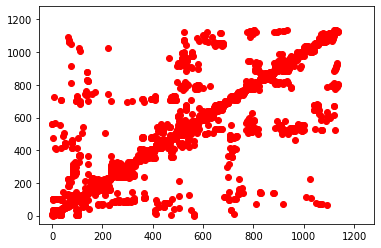

Lista de larguras:  [199.0, 127.0, 157.0, 159.0, 199.0, 119.0, 136.0, 147.0, 132.0, 121.0, 144.0, 147.0, 157.0, 148.0, 132.0, 133.0, 122.0, 110.0, 113.0, 125.0] 

0) Menor largura de banda atual:  110.0 

Lista de larguras:  [166.0, 125.0, 148.0, 145.0, 140.0, 150.0, 147.0, 150.0, 127.0, 160.0, 132.0, 156.0, 147.0, 158.0, 171.0, 141.0, 176.0, 114.0, 132.0, 131.0] 

1) Menor largura de banda atual:  114.0 

Lista de larguras:  [157.0, 170.0, 132.0, 158.0, 137.0, 150.0, 144.0, 132.0, 164.0, 165.0, 125.0, 147.0, 140.0, 164.0, 127.0, 145.0, 144.0, 127.0, 135.0, 156.0] 

2) Menor largura de banda atual:  125.0 

Lista de larguras:  [156.0, 135.0, 164.0, 142.0, 120.0, 124.0, 131.0, 131.0, 132.0, 131.0, 167.0, 110.0, 149.0, 134.0, 127.0, 134.0, 159.0, 189.0, 147.0, 152.0] 

3) Menor largura de banda atual:  110.0 

Lista de larguras:  [132.0, 134.0, 124.0, 142.0, 160.0, 134.0, 118.0, 113.0, 159.0, 130.0, 140.0, 110.0, 130.0, 161.0, 127.0, 130.0, 130.0, 155.0, 110.0, 132.0] 

4) Menor largura 

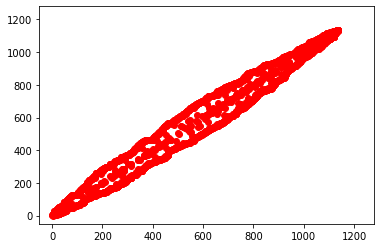

In [ ]:
main()